In [27]:
from pycbc.waveform import get_td_waveform
#from pycbc.waveform import td_approximants 
#import pycbc.catalog
import pylab
import ringdown.qnms
import numpy as np
import qnm
import lal
from collections import namedtuple
import math
T_MSUN = lal.MSUN_SI * lal.G_SI / lal.C_SI**3
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import arviz as az
from pycbc.types import TimeSeries
import ringdown as rd
import seaborn as sns
import pandas as pd
sns.set(context='notebook', palette='colorblind')

In [28]:
#print(td_approximants())
# this is trimming timeseries hp.sample_times and hp/hc data to start at 0 
hp_smp_ts = TimeSeries(hp.sample_times, delta_t=1/16384, epoch=0)
cond = hp_smp_ts.crop(0.645,0)
#use cond for cropped sample times

hp_data = TimeSeries(hp, delta_t=1/16384, epoch=0)
cond_hp = hp_data.crop(0.645,0)

#use cond_hp for the cropped data

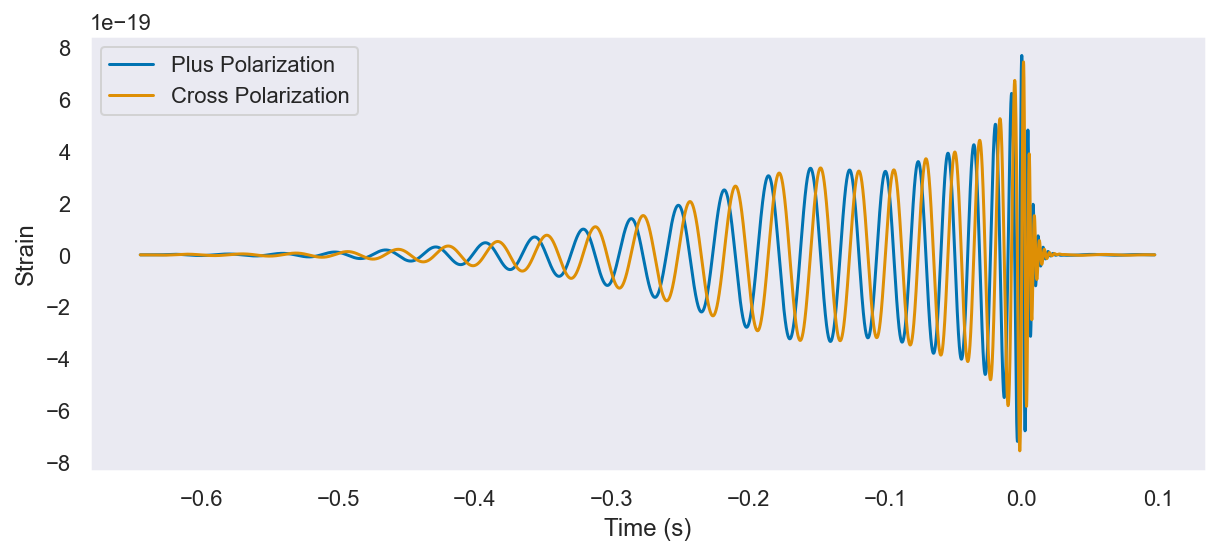

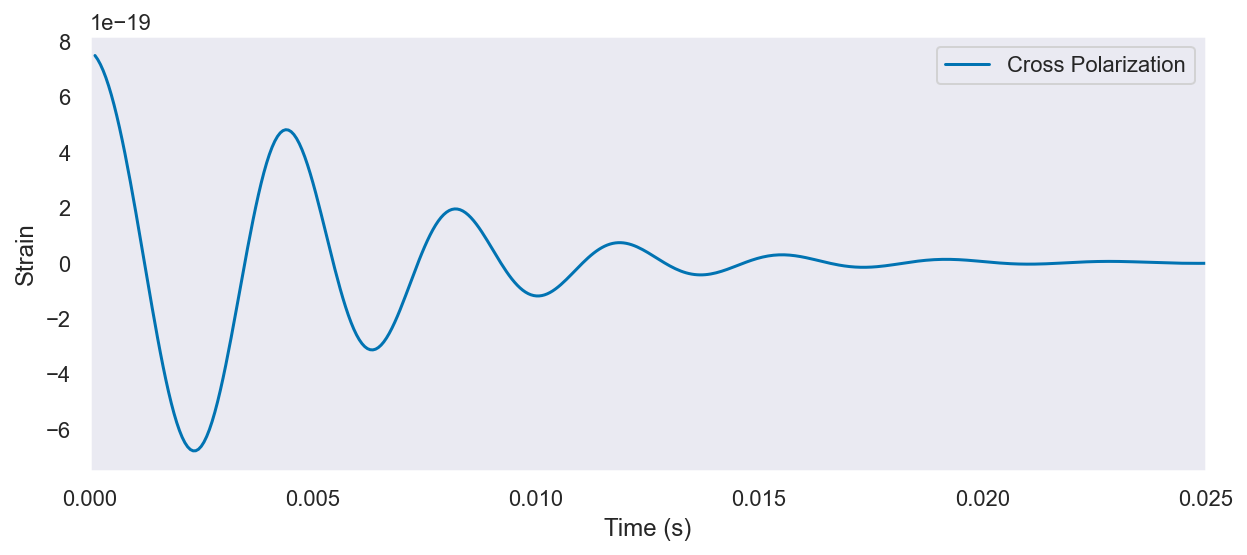

In [29]:
hp, hc = get_td_waveform(approximant="IMRPhenomXP",
                         mass1=36,
                         mass2=29,
                         delta_t=1.0/16384,
                         f_lower=30)

pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
#pylab.xlim(-1.75, 0.25)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.legend()
pylab.grid()
pylab.show()

pylab.figure(figsize=pylab.figaspect(0.4))
#pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(cond, cond_hp, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.xlim(0, .025)
pylab.legend()
pylab.grid()
pylab.show()

#this waveform generated with masses from GW150914

In [30]:
# 0th overtone
k = ringdown.qnms.get_ftau(62,0.67,0,2,2)
gamma1 = (k[1])**-1
print('freq:',k[0],'damping time:',gamma1)

#first overtone
k2 = ringdown.qnms.get_ftau(62,0.67,1,2,2)
gamma2 = (k2[1])**-1
print('freq:',k2[0],'damping time:',gamma2)

freq: 270.9329129239895 damping time: 268.0106327377051
freq: 264.51010703202877 damping time: 810.7700343668732


In [31]:
# define sampling rate and duration (make these powers of two) 
duration = 4
t0 = 0

delta_t = 1/16384
tlen = int(round(duration / delta_t))
epoch = t0 - 0.5*tlen*delta_t

time = cond

TypeError: no numeric data to plot

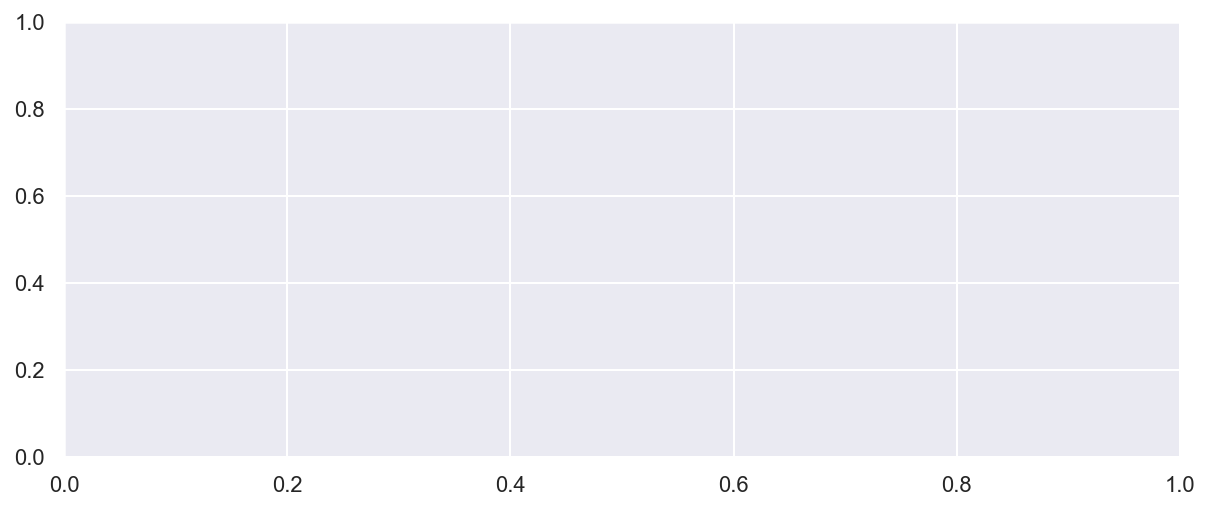

In [32]:
wf_kws = dict(
    A = 9e-19,
    phi = 0,
    f = k[0],
    gamma = gamma1,
)

wf_kws2 = dict(
    A = 9e-19,
    phi = 0,
    f = k2[0],
    gamma = gamma2,
)

def get_signal(time, A, phi, f, gamma):
    s = A*np.cos(2*np.pi*f*(time-t0) + phi)*np.exp(-gamma*abs(time-t0))
    return rd.Data(s, index=time)

signal = get_signal(time, **wf_kws)
signal2 = get_signal(time, **wf_kws2)
################################################

pylab.figure(figsize=pylab.figaspect(0.4))
signal.plot(label='0th overtone')
signal2.plot(label='1st overtone')
xlim(0, 0.03)
xlabel('Time (s)')
ylabel('Strain')
legend()

In [ ]:
#use crop
#imrphenomD
#imrphenomxas